In [1]:
import tensorflow as tf
import CNN_utility
import numpy as np
import sklearn.model_selection as model_selection

In [2]:
dataset = '/home/ragu/GIT/dataset/leaves'
images, labels, class_names = CNN_utility.load_data(dataset)

  8%|▊         | 4/50 [00:00<00:01, 33.67it/s]

Loading Dataset /home/ragu/GIT/dataset/leaves


100%|██████████| 50/50 [00:00<00:00, 50.60it/s]


In [3]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [4]:
images = images/255.0

In [5]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit(train_images, train_labels, batch_size=128, epochs = 5, validation_split = 0.2)

Epoch 1/5
8/8 [==============================] - 16s 2s/step - loss: 3.3985 - accuracy: 0.0658 - val_loss: 3.3011 - val_accuracy: 0.1750
Epoch 2/5
8/8 [==============================] - 16s 2s/step - loss: 2.9058 - accuracy: 0.2359 - val_loss: 2.5769 - val_accuracy: 0.3167
Epoch 3/5
8/8 [==============================] - 16s 2s/step - loss: 2.0491 - accuracy: 0.4342 - val_loss: 2.0284 - val_accuracy: 0.3792
Epoch 4/5
8/8 [==============================] - 16s 2s/step - loss: 1.5349 - accuracy: 0.5459 - val_loss: 1.7570 - val_accuracy: 0.5375
Epoch 5/5
8/8 [==============================] - 15s 2s/step - loss: 1.1729 - accuracy: 0.6785 - val_loss: 1.3676 - val_accuracy: 0.6042


In [9]:
evaluate = model.evaluate(test_images, test_labels)

10/10 [==============================] - 1s 78ms/step - loss: 1.4295 - accuracy: 0.5833


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

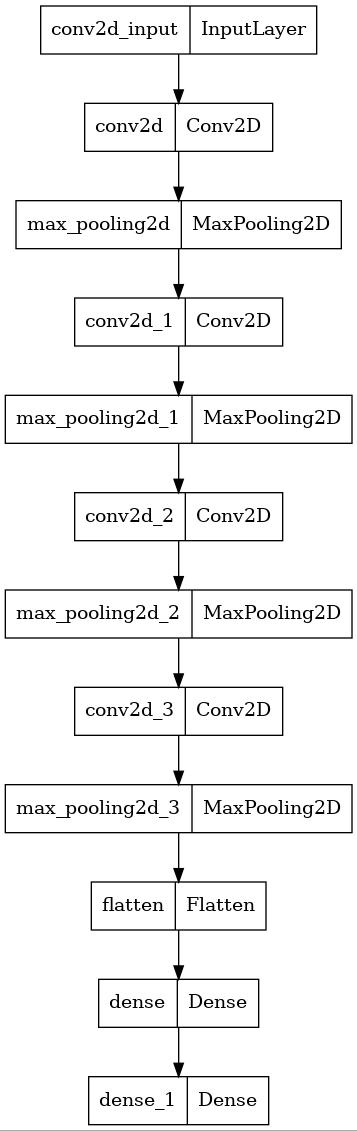

In [11]:
CNN_utility.model_blocks(model)

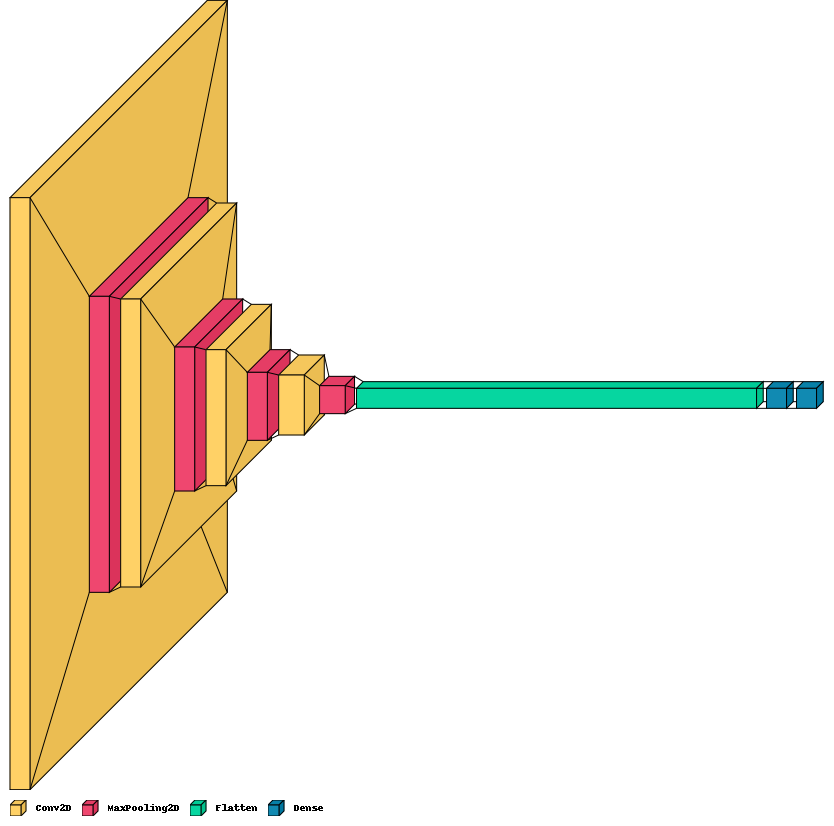

In [12]:
CNN_utility.gui_model(model)

In [13]:
CNN_utility.netron_web(model) 

Serving 'history.h5' at http://localhost:8081


conv2d (3, 3, 3, 32)


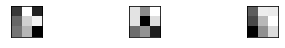

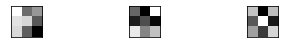

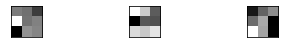

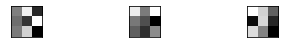

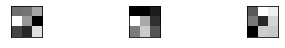

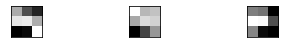

conv2d_1 (3, 3, 32, 64)


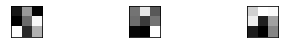

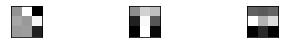

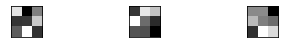

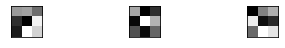

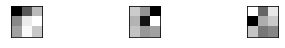

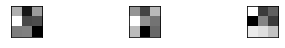

conv2d_2 (3, 3, 64, 128)


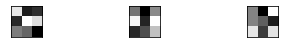

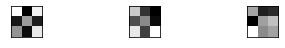

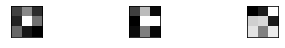

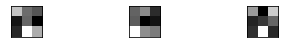

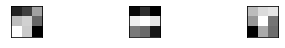

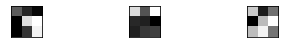

conv2d_3 (3, 3, 128, 256)


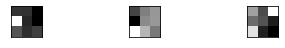

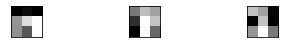

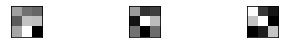

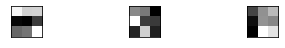

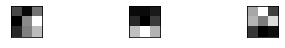

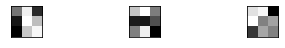

In [14]:
CNN_utility.filters(model) 

In [15]:
#CNN_utility.feature_map(model) 

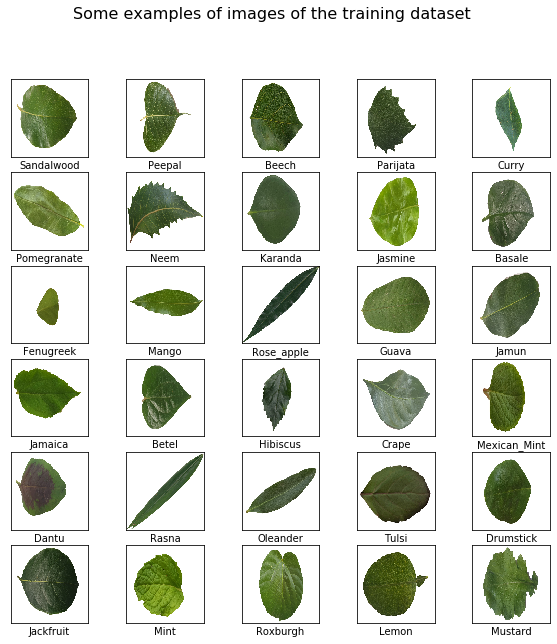

<Figure size 432x288 with 0 Axes>

In [16]:
CNN_utility.dataset_sample(class_names, train_images, train_labels)

In [17]:
predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels

10/10 [==============================] - 1s 86ms/step


In [18]:
CNN_utility.Performance_Metrics(actual, predictions , class_names)

,class_name,TP,FP,TN,FN,Accuracy,Precision,Recall,F_measure,Error_rate,Specificity,FNR,FPR
0,Crape,9,1,6,6,68.18,90.00,60.00,72.00,31.82,85.71,14.29,40.00
1,Sandalwood,4,4,7,7,50.00,50.00,36.36,42.11,50.00,63.64,36.36,63.64
2,Jasmine,2,1,9,9,52.38,66.67,18.18,28.57,47.62,90.00,10.00,81.82
3,Guava,13,1,0,0,92.86,92.86,100.00,96.30,7.14,0.00,100.00,0.00
4,Roxburgh,8,6,2,2,55.56,57.14,80.00,66.67,44.44,25.00,75.00,20.00
5,Oleander,4,8,3,3,38.89,33.33,57.14,42.11,61.11,27.27,72.73,42.86
6,Fenugreek,10,4,0,0,71.43,71.43,100.00,83.33,28.57,0.00,100.00,0.00
7,Dantu,8,7,4,4,52.17,53.33,66.67,59.26,47.83,36.36,63.64,33.33
8,Rasna,6,4,0,0,60.00,60.00,100.00,75.00,40.00,0.00,100.00,0.00
9,Curry,0,3,11,11,44.00,0.00,0.00,NaN,56.00,78.57,21.43,100.00


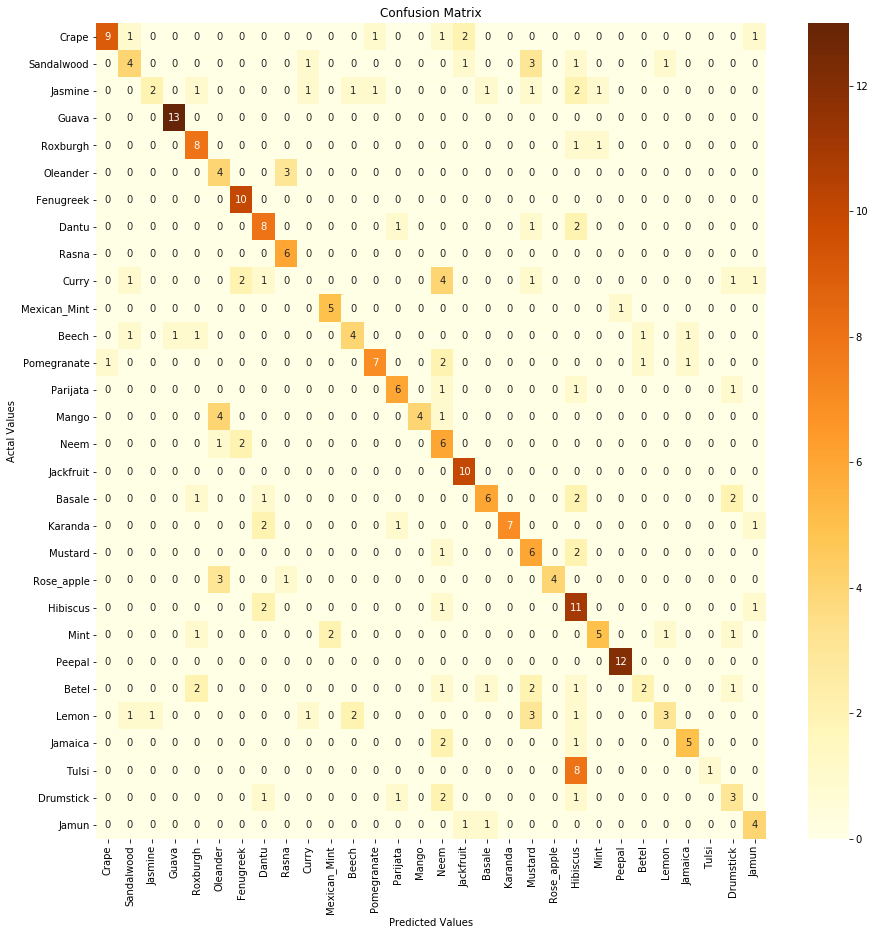

<Figure size 432x288 with 0 Axes>

In [19]:
CNN_utility.Confusion_matrix(actual, predictions , class_names)

In [20]:
CNN_utility.system()

Tensorflow version: 2.11.0
CPU cores: 12
RAM: 7.719559168 GB
[]


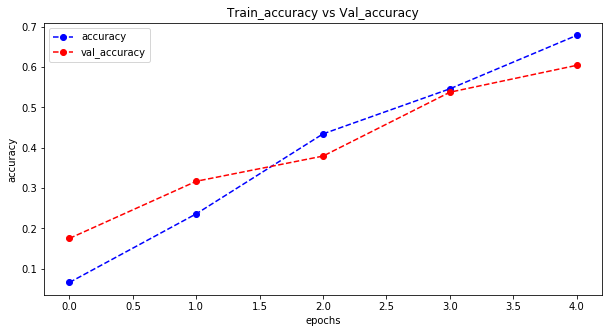

<Figure size 432x288 with 0 Axes>

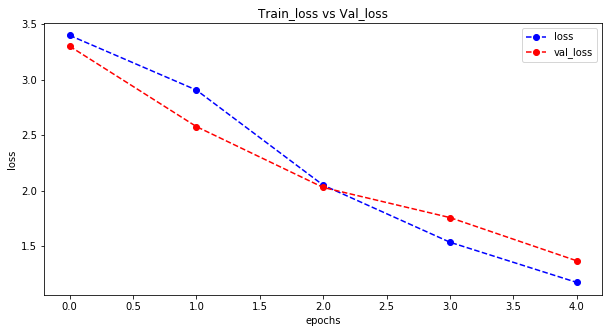

<Figure size 432x288 with 0 Axes>

In [21]:
CNN_utility.plot_accuracy_loss(history)